In [5]:
print("h")

h


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo CSV
df = pd.read_csv('df_anscombe.csv')
print("Dataset cargado exitosamente!")
print(f"Total de filas: {len(df)}")
print(f"\nPrimeras filas:")
df.head()


Dataset cargado exitosamente!
Total de filas: 44

Primeras filas:


,x,y,group
0,10.0,8.04,1
1,8.0,6.95,1
2,13.0,7.58,1
3,9.0,8.81,1
4,11.0,8.33,1


In [7]:
# Descripción estadística completa
print("=" * 50)
print("DESCRIPCIÓN ESTADÍSTICA DEL DATASET")
print("=" * 50)
df.describe()


DESCRIPCIÓN ESTADÍSTICA DEL DATASET


,x,y,group
count,44.000000,44.000000,44.00000
mean,9.000000,7.500682,2.50000
std,3.198837,1.958925,1.13096
min,4.000000,3.100000,1.00000
25%,7.000000,6.117500,1.75000
50%,8.000000,7.520000,2.50000
75%,11.000000,8.747500,3.25000
max,19.000000,12.740000,4.00000


In [8]:
# Descripción estadística por cada grupo
print("=" * 50)
print("DESCRIBE() POR GRUPO")
print("=" * 50)

for grupo in range(1, 5):
    print(f"\n{'='*50}")
    print(f"GRUPO {grupo}")
    print('='*50)
    print(df[df['group'] == grupo][['x', 'y']].describe())
    print()


DESCRIBE() POR GRUPO

GRUPO 1
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031568
min     4.000000   4.260000
25%     6.500000   6.315000
50%     9.000000   7.580000
75%    11.500000   8.570000
max    14.000000  10.840000


GRUPO 2
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031657
min     4.000000   3.100000
25%     6.500000   6.695000
50%     9.000000   8.140000
75%    11.500000   8.950000
max    14.000000   9.260000


GRUPO 3
               x          y
count  11.000000  11.000000
mean    9.000000   7.500000
std     3.316625   2.030424
min     4.000000   5.390000
25%     6.500000   6.250000
50%     9.000000   7.110000
75%    11.500000   7.980000
max    14.000000  12.740000


GRUPO 4
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.030579
min     8.000000   5.250000
25%     8.000000   6.170000
50%     8.000000

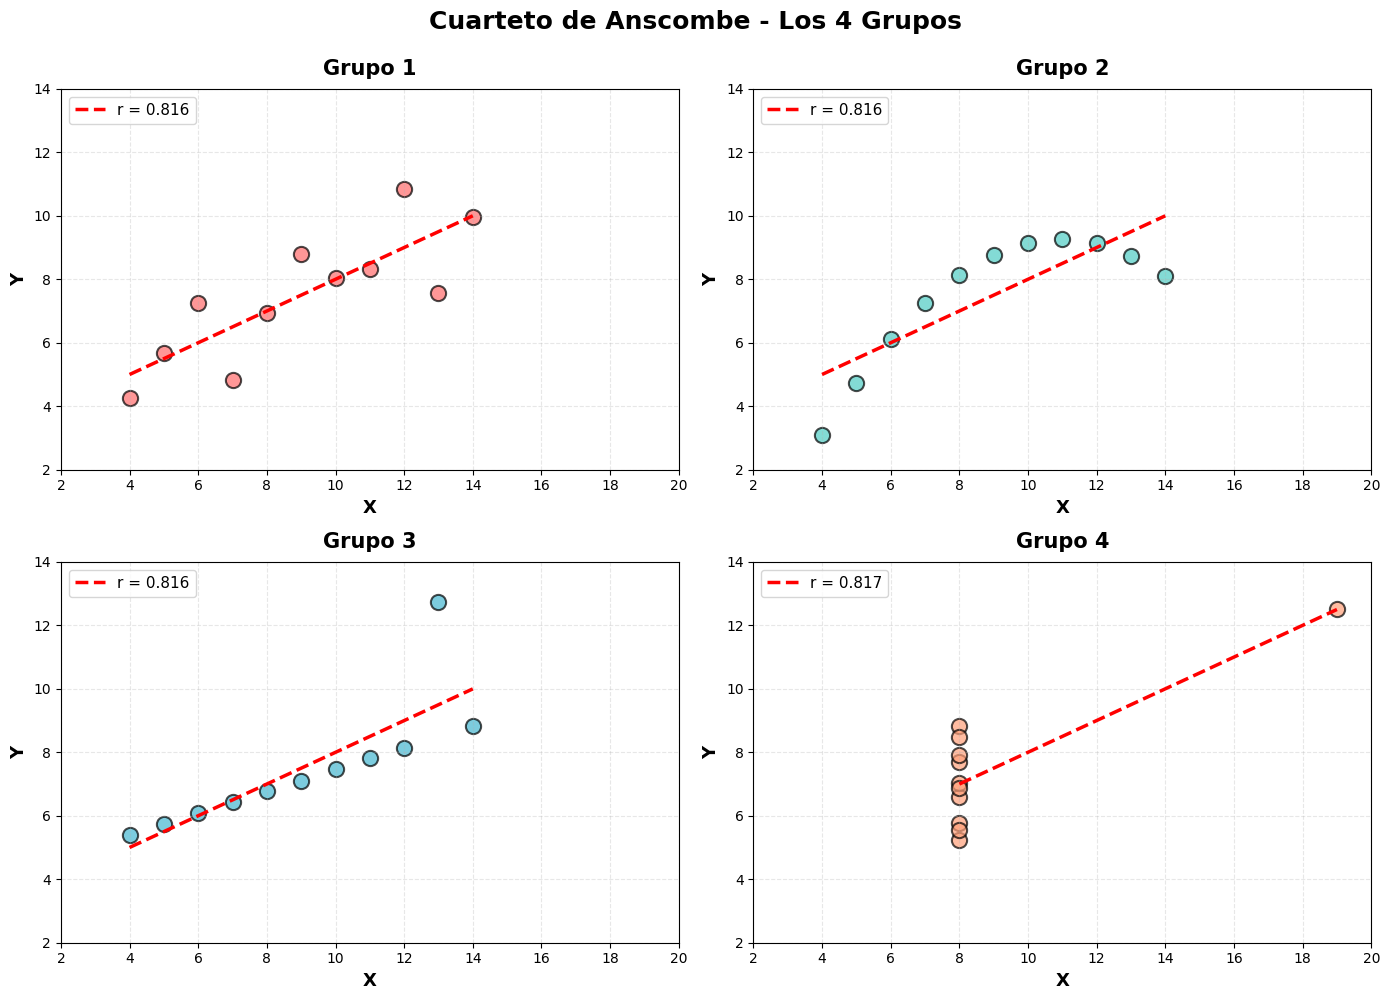


✅ Gráficas generadas exitosamente!


In [9]:
# Crear gráficas de los 4 grupos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Cuarteto de Anscombe - Los 4 Grupos', fontsize=18, fontweight='bold', y=0.995)

grupos = [1, 2, 3, 4]
posiciones = [(0, 0), (0, 1), (1, 0), (1, 1)]
colores = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

for grupo, (i, j), color in zip(grupos, posiciones, colores):
    # Filtrar datos por grupo
    datos_grupo = df[df['group'] == grupo]
    
    # Hacer scatter plot
    axes[i, j].scatter(datos_grupo['x'], datos_grupo['y'], 
                       color=color, s=120, alpha=0.7, edgecolors='black', linewidth=1.5)
    
    # Calcular y agregar línea de regresión
    x_vals = datos_grupo['x']
    y_vals = datos_grupo['y']
    
    # Coeficiente de correlación
    coef = x_vals.corr(y_vals)
    
    # Pendiente e intercepto
    m = y_vals.cov(x_vals) / x_vals.var()
    b = y_vals.mean() - m * x_vals.mean()
    
    # Dibujar línea de regresión
    x_line = pd.Series([x_vals.min(), x_vals.max()])
    y_line = m * x_line + b
    axes[i, j].plot(x_line, y_line, color='red', linestyle='--', linewidth=2.5, 
                    label=f'r = {coef:.3f}')
    
    # Configurar el subplot
    axes[i, j].set_xlabel('X', fontsize=13, fontweight='bold')
    axes[i, j].set_ylabel('Y', fontsize=13, fontweight='bold')
    axes[i, j].set_title(f'Grupo {grupo}', fontsize=15, fontweight='bold', pad=10)
    axes[i, j].grid(True, alpha=0.3, linestyle='--')
    axes[i, j].legend(fontsize=11, loc='upper left')
    axes[i, j].set_xlim(2, 20)
    axes[i, j].set_ylim(2, 14)

plt.tight_layout()
plt.show()

print("\n✅ Gráficas generadas exitosamente!")


In [10]:
# Resumen comparativo de los 4 grupos
print("=" * 70)
print("RESUMEN COMPARATIVO DE LOS 4 GRUPOS")
print("=" * 70)

resumen = []
for grupo in range(1, 5):
    datos = df[df['group'] == grupo]
    resumen.append({
        'Grupo': grupo,
        'Media X': datos['x'].mean(),
        'Media Y': datos['y'].mean(),
        'Std X': datos['x'].std(),
        'Std Y': datos['y'].std(),
        'Correlación': datos['x'].corr(datos['y'])
    })

df_resumen = pd.DataFrame(resumen)
print("\n", df_resumen.to_string(index=False))
print("\n" + "=" * 70)
print("💡 Observación: Los 4 grupos tienen estadísticas casi idénticas,")
print("   ¡pero distribuciones completamente diferentes!")
print("=" * 70)


RESUMEN COMPARATIVO DE LOS 4 GRUPOS

  Grupo  Media X  Media Y    Std X    Std Y  Correlación
     1      9.0 7.500909 3.316625 2.031568     0.816421
     2      9.0 7.500909 3.316625 2.031657     0.816237
     3      9.0 7.500000 3.316625 2.030424     0.816287
     4      9.0 7.500909 3.316625 2.030579     0.816521

💡 Observación: Los 4 grupos tienen estadísticas casi idénticas,
   ¡pero distribuciones completamente diferentes!
